In [90]:
import matplotlib.pyplot as plt 
import numpy as np

# input data -costants
cm = 10 #nF/mm^2
gl = 1.0 #microS/mm^2
El = -70 #mV
Eex = 0
Vth = -54 #mV
Vreset = -80 #mV
tau_ex = 5 #ms

# plasticity 
A_ltp = 0.35 # microS/mm^2
A_ltd = 0.4 # microS/mm^2
tau_ltp = 25 #ms
tau_ltd = 35 #ms
max_delta_gcs = 1.2 # micro S/mm^2
min_delta_gcs = 0 # micro S/mm^2
delta_gus = 1.2 # micro S/mm^2

# simulation times
dt = 0.1 #ms
t_range = np.arange(0, 1000, dt)

# spike times

# test 1
# us_stim_times = [100, 200, 300, 400, 500, 600]
# cs_stim_times = [90, 190, 290, 390, 490, 590, 690, 790, 890]
# delta_gcs = 0

# # test 2
us_stim_times = [100, 200, 300, 400, 500, 600]
cs_stim_times = [110, 210, 310, 410, 510, 610, 710, 810,910]
delta_gcs = 1

# init voltage, g-ex and I-ex
V_t = np.zeros(len(t_range))
g_ex = np.zeros(len(t_range))
spikes = np.zeros(len(t_range))


# initial condition
V_t[0] = El

t_post = 0
t_pre = 0
cs_spike_times = []
for ii in range(1,len(t_range)):

    t = t_range[ii] 
        
    # get excitatory conductance 
    dgex = - g_ex[ii-1]/tau_ex 
    g_ex[ii] = g_ex[ii-1] + dt * dgex
    

    # unconditioned stim presentation
    if t in us_stim_times:
            g_ex[ii] += delta_gus

    # conditioned stim presentation
    if t in cs_stim_times:
        g_ex[ii] += delta_gcs 
        t_pre= t
        cs_spike_times.append(t)
        if (t-t_post) > 0: # there was a recent postynaptic spike
            # LTP
            dt_ltd = t - t_post            
            delta_gcs = delta_gcs - (A_ltd*np.exp(-dt_ltd/tau_ltd))
            # check if in boundaries
            if delta_gcs > max_delta_gcs:
                delta_gcs = max_delta_gcs
            elif delta_gcs < min_delta_gcs:
                delta_gcs = min_delta_gcs
           

    # get voltage
    dV = (-gl * (V_t[ii-1] - El) - g_ex[ii] * (V_t[ii-1] - Eex)) / cm
    V_t[ii] = V_t[ii-1] + dt * dV

    # check if it spiked
    if V_t[ii] >= Vth:
        V_t[ii] = Vreset
        spikes[ii] = 1
        t_post = t
        # LTP
        if (t-t_pre) > 0:
            dt_ltp = t - t_pre            
            delta_gcs = delta_gcs + (A_ltp*np.exp(-dt_ltp/tau_ltp))
            # check if in boundaries
            if delta_gcs > max_delta_gcs:
                delta_gcs = max_delta_gcs
            elif delta_gcs < min_delta_gcs:
                delta_gcs = min_delta_gcs


        

/var/folders/cx/cs17d2nd74l5j24x969_flvr0000gn/T/ipykernel_3125/3246922155.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/cx/cs17d2nd74l5j24x969_flvr0000gn/T/ipykernel_3125/3246922155.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'g_ex (uS/mm^2)')

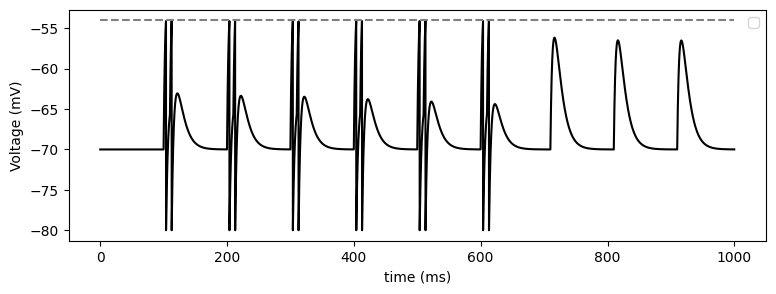

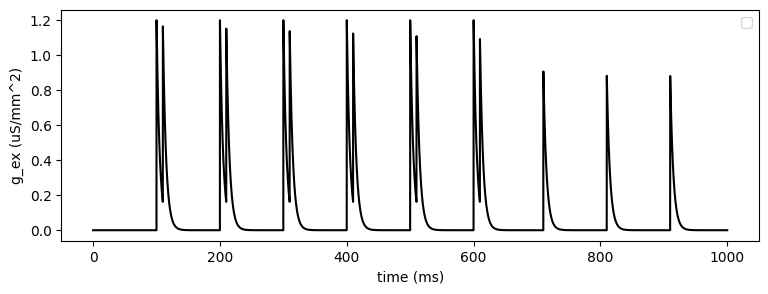

In [91]:
plt.figure(figsize=(9, 3))
plt.plot(t_range, V_t, 'k')
# plt.vlines(cs_stim_times, -80, -50, color='r', label='Conditioned stim')
# plt.vlines(us_stim_times, -80, -50, color='b', label='Unconditioned stim')
plt.hlines(Vth, 0, 1000, color = 'grey', linestyles='--')
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('Voltage (mV)')

plt.figure(figsize=(9, 3))
plt.plot(t_range, g_ex, 'k')
# plt.vlines(cs_stim_times, 0, 1.5, color='r', label='Conditioned stim')
# plt.vlines(us_stim_times, 0, 1.5, color='b', label='Unconditioned stim')
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('g_ex (uS/mm^2)')